In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches
%matplotlib inline
import numpy as np

darks=['#ff7200', '#984ea3', '#7fc97f', '#3a80b0', '#e261b0']
pastels=['#fed9a6','#decbe4','#ccebc5', '#b3cde3', '#f4cae4']

#old naming conventions used 
# A = SEQ1/ related
# C=  SEQ2/ related
# D = SEQ3/ related
# E = SEQ4/ related
# F = SEQ5/ related

In [2]:
#query is animal homolog, subject is original (human)

#file input should be needleman-wunsch alignment from NCBI blast page, aligned txt file

def read_align_file(filename):
    with open(filename)as f:
        x=f.readlines()
    query=''
    subject=''
    for line in x:
        if line[0:6]=='Query ':
            query=query+line[13:73]
        if line[0:6]=='Sbjct ':
            subject=subject+line[13:73]
    query=query[0:query.find('  ')]
    subject=subject[0:subject.find('  ')]
    return(query, subject)



In [3]:
#0=same
#1=mismatch: q in ['A', 'T', 'G', 'C'], s in ['A', 'T', 'G', 'C']
#2=insertion: s=='-', q in ['A', 'T', 'G', 'C']
#3=deletion:q=='-', s in ['A', 'T', 'G', 'C']
def parse_mut(query, subject):
    mut=[] #array of 0's and 1's indicating matches/mismatches
    ins=[-10] #array keeping track of position of insertion
    ins_len=[0] #for each insertion position, array of insertion length
    dels=[-10]
    del_len=[0]
    
    for q,s, in zip(query, subject):
        if q==s: #match
            mut.append(0)
        elif q!=s and (q in ['A', 'T', 'G', 'C'] and s in ['A', 'T', 'G', 'C']): #mismatch
            mut.append(1)
        elif q!=s and (q in ['A', 'T', 'G', 'C'] and s=='-'): #insertion
            if len(mut) != ins[-1]: #new insertion
                ins.append(len(mut))
                ins_len.append(1)
            elif len(mut)==ins[-1]: #extend insertion length only
                ins_len[-1]+=1
        elif q!=s and (q=='-' and s in ['A', 'T', 'G', 'C']): #deletion
            if len(mut) != dels[-1]+del_len[-1]: #new deletion
                dels.append(len(mut))
                del_len.append(1)
            elif len(mut)==dels[-1]+del_len[-1]: #extend del length
                del_len[-1]+=1
            mut.append(3) #keep track of target sequence length
    
    ins=ins[1::]
    ins_len=ins_len[1::]
    
    dels=dels[1::]
    del_len=del_len[1::]
    
    return(mut, ins, ins_len, dels, del_len)


def plot_align(mut, ins, ins_len, color, fname):
    fig, ax=plt.subplots(figsize=(8,1), dpi=300)
    w=.1
    z=np.array(mut)
    x=np.arange(0, len(z), 1)
    
    for pos in ins:
        ax.bar(pos*w, 1.3, width=w, color='red')
#         ax.plot([pos*w, pos*w], [1, 1.3], '-', color='red', linewidth=w)
    
#    for pos, ins_l in zip(ins, ins_len):
#         ax.plot([(pos+ins_l/2)*w, (pos+ins_l)*w, (pos)*w, (pos+ins_l/2)*w], [1, 1.3, 1.3, 1], '-', color='red', linewidth=.1)
#         plt.fill([(pos+ins_l/2)*w, (pos+ins_l)*w, (pos)*w, (pos+ins_l/2)*w], [1, 1.3, 1.3, 1], color='red')
        #ax.bar([(pos+ins_l/2)*w], [2], width=w*ins_l, color='red')
    ax.bar(x[z==1]*w, np.ones(len(z[z==1])), width=w, color='red')
    ax.bar(x[z==0]*w, np.ones(len(z[z==0])), width=w, color=color)    
#     ax.bar(x[z==3]*w, -.3*np.ones(len(z[z==3])), width=w, color='red')
    ax.set_ylim([0,2.5])
    ax.set_yticks([])
    ax.set_xticks([])
    
    lw=4
    ax.plot([0,len(z)*w], [0,0], '-', color='black', linewidth=lw, clip_on=False)
    ax.plot([0,len(z)*w], [1,1], '-', color='black', linewidth=lw)
    ax.plot([0,0], [0,1], '-', color='black', linewidth=lw)
    ax.plot([len(z)*w,len(z)*w], [0,1], '-', color='black', linewidth=lw)
    
    ax.tick_params(which='major', direction='out', length=0, width=4)
    ax.tick_params(which='minor', direction='out', length=0, width=2)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0)
        ax.spines[axis].set_color('black')
    ax.tick_params(axis='both', which='major', labelsize=40)
    
    ax.set_alpha(0)
    


    plt.show()
    plt.tight_layout()
    fig.savefig(fname+'.pdf', bbox_inches='tight')#, transparent=True)
    plt.close()

1799


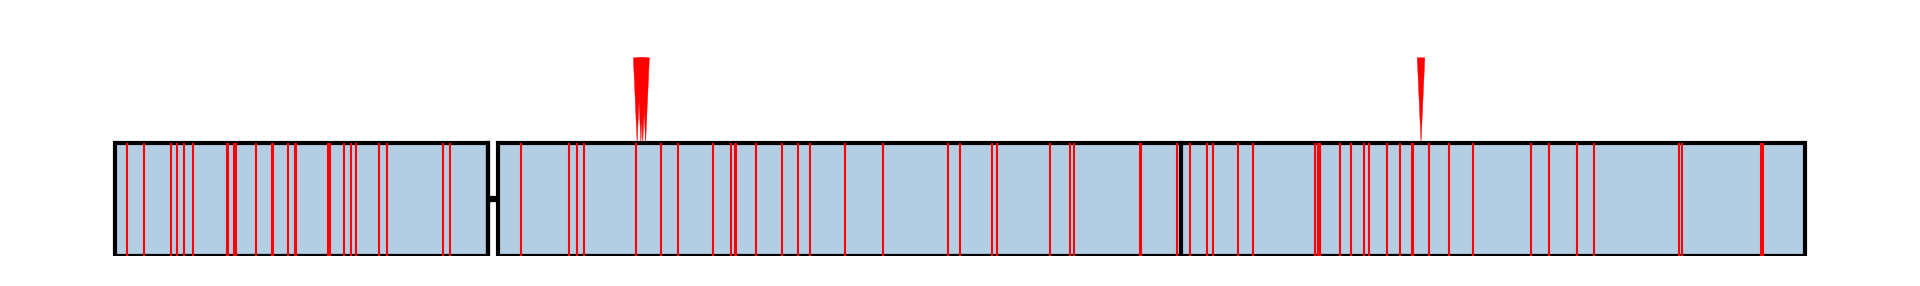

In [4]:
A_mmulatta_q, A_mmulatta_s=read_align_file('A_mmulatta_align.txt')
# print(A_mmulatta_q)
# print(A_mmulatta_s)
    
A_mmulatta_plot, A_mmulatta_ins, A_mmulatta_ins_len, A_mmulatta_del, A_mmulatta_del_len=parse_mut(A_mmulatta_q, A_mmulatta_s)
print(len(A_mmulatta_plot))

muts=A_mmulatta_plot
inss=A_mmulatta_ins
ins_lens=A_mmulatta_ins_len
dels=A_mmulatta_del
del_lens=A_mmulatta_del_len

color=pastels[3]
title='A_mmulatta'


mm_lw=.5

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1799


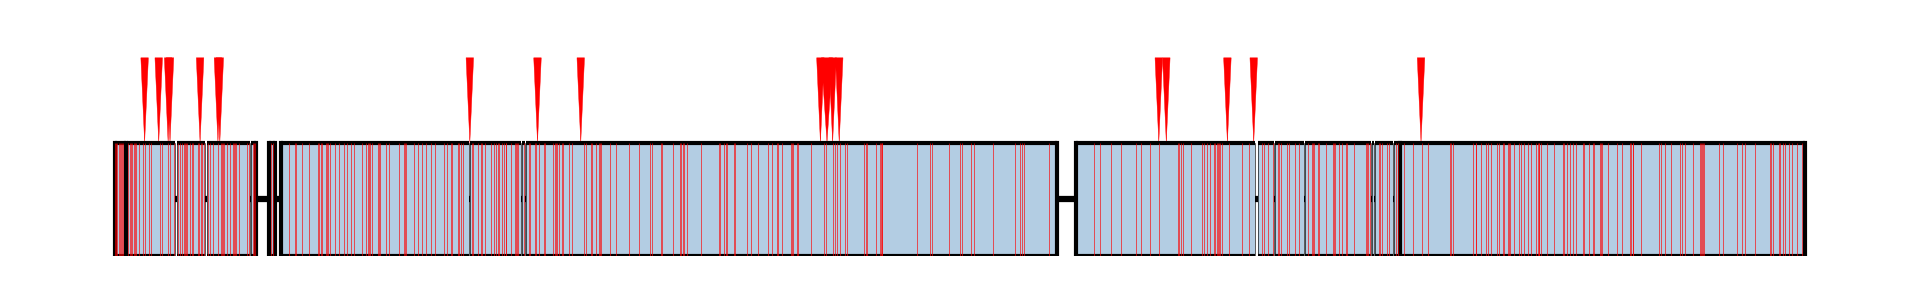

In [5]:
A_ppip_q, A_ppip_s=read_align_file('A_ppip_align.txt')
# print(A_ppip_q)
# print(A_ppip_s)

A_ppip_plot, A_ppip_ins, A_ppip_ins_len, A_ppip_del, A_ppip_del_len=parse_mut(A_ppip_q, A_ppip_s)
print(len(A_ppip_plot))

title='A_ppip'
muts=A_ppip_plot
inss=A_ppip_ins
ins_lens=A_ppip_ins_len
dels=A_ppip_del
del_lens=A_ppip_del_len

color=pastels[3]

mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1799


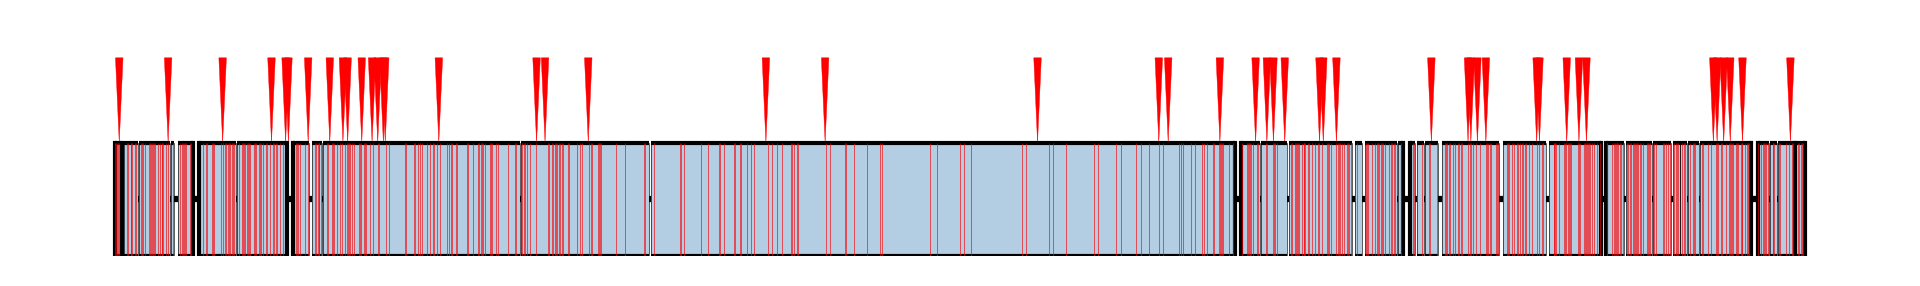

In [6]:
A_clupus_q, A_clupus_s=read_align_file('A_clupus_align.txt')
# print(A_clupus_q)
# print(A_clupus_s)

A_clupus_plot, A_clupus_ins, A_clupus_ins_len, A_clupus_del, A_clupus_del_len=parse_mut(A_clupus_q, A_clupus_s)
print(len(A_clupus_plot))

title='A_clupus'

muts=A_clupus_plot
inss=A_clupus_ins
ins_lens=A_clupus_ins_len
dels=A_clupus_del
del_lens=A_clupus_del_len

color=pastels[3]
title='A_clupus'
mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1792


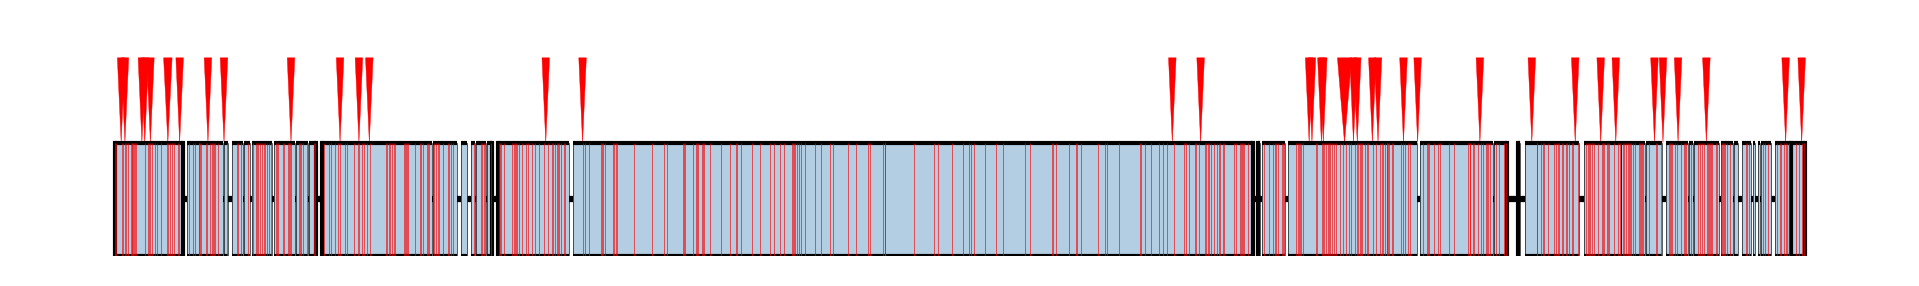

In [7]:
A_mmus_q, A_mmus_s=read_align_file('A_mmusculus_align.txt')
# print(A_mmus_q)
# print(A_mmus_s)

A_mmus_plot, A_mmus_ins, A_mmus_ins_len, A_mmus_del, A_mmus_del_len=parse_mut(A_mmus_q, A_mmus_s)
print(len(A_mmus_plot))

muts=A_mmus_plot
inss=A_mmus_ins
ins_lens=A_mmus_ins_len
dels=A_mmus_del
del_lens=A_mmus_del_len

color=pastels[3]

title='A_mmus'
mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1799


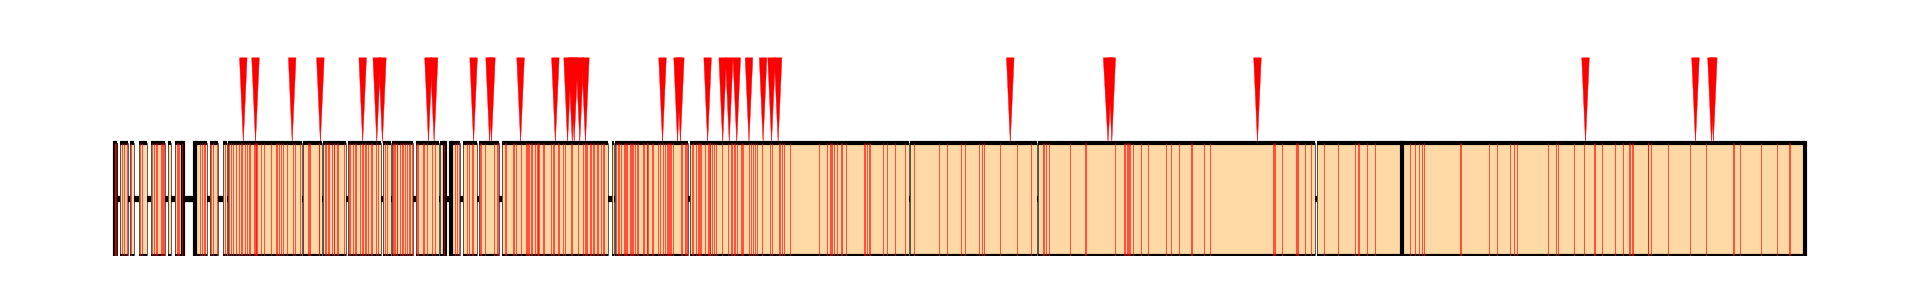

In [8]:
C_ptrog_q, C_ptrog_s=read_align_file('C_ptrog_align.txt')


C_ptrog_plot, C_ptrog_ins, C_ptrog_ins_len, C_ptrog_del, C_ptrog_del_len=parse_mut(C_ptrog_q, C_ptrog_s)
print(len(C_ptrog_plot))

muts=C_ptrog_plot
inss=C_ptrog_ins
ins_lens=C_ptrog_ins_len
dels=C_ptrog_del
del_lens=C_ptrog_del_len

color=pastels[0]
title='C_ptrog'

mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1691


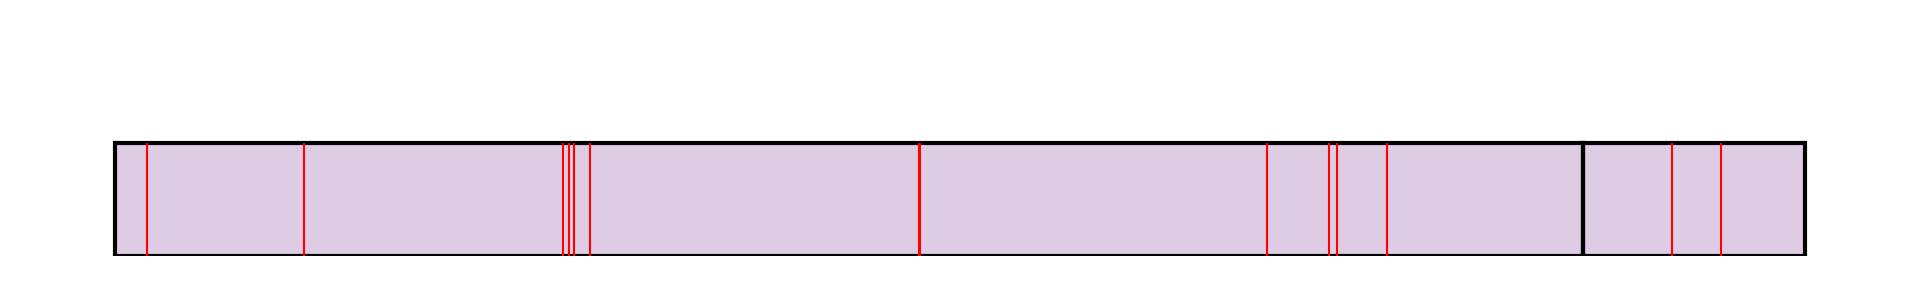

In [9]:
D_ptrog_q, D_ptrog_s=read_align_file('D_ptrog_align.txt')
# print(D_ptrog_q)
# print(D_ptrog_s)

D_ptrog_plot, D_ptrog_ins, D_ptrog_ins_len, D_ptrog_del, D_ptrog_del_len=parse_mut(D_ptrog_q, D_ptrog_s)
print(len(D_ptrog_plot))


muts=D_ptrog_plot
inss=D_ptrog_ins
ins_lens=D_ptrog_ins_len
dels=D_ptrog_del
del_lens=D_ptrog_del_len

color=pastels[1]

title='D_ptrog'

mm_lw=.5

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1691


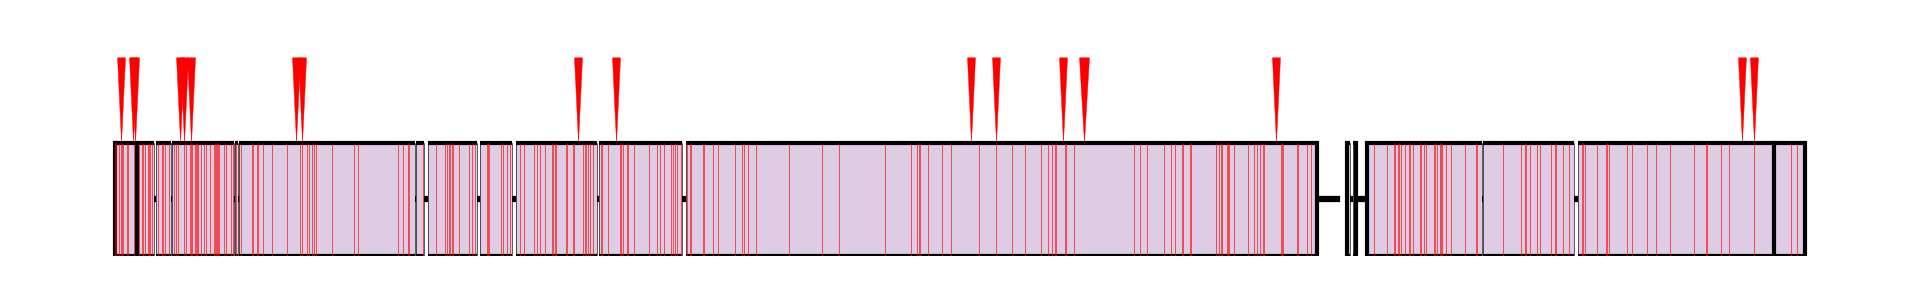

In [10]:
D_clupus_q, D_clupus_s=read_align_file('D_clupus_align.txt')
# print(D_clupus_q)
# print(D_clupus_s)

D_clupus_plot, D_clupus_ins, D_clupus_ins_len, D_clupus_del, D_clupus_del_len=parse_mut(D_clupus_q, D_clupus_s)
print(len(D_clupus_plot))

muts=D_clupus_plot
inss=D_clupus_ins
ins_lens=D_clupus_ins_len
dels=D_clupus_del
del_lens=D_clupus_del_len

color=pastels[1]
title='D_clupus'

mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1799


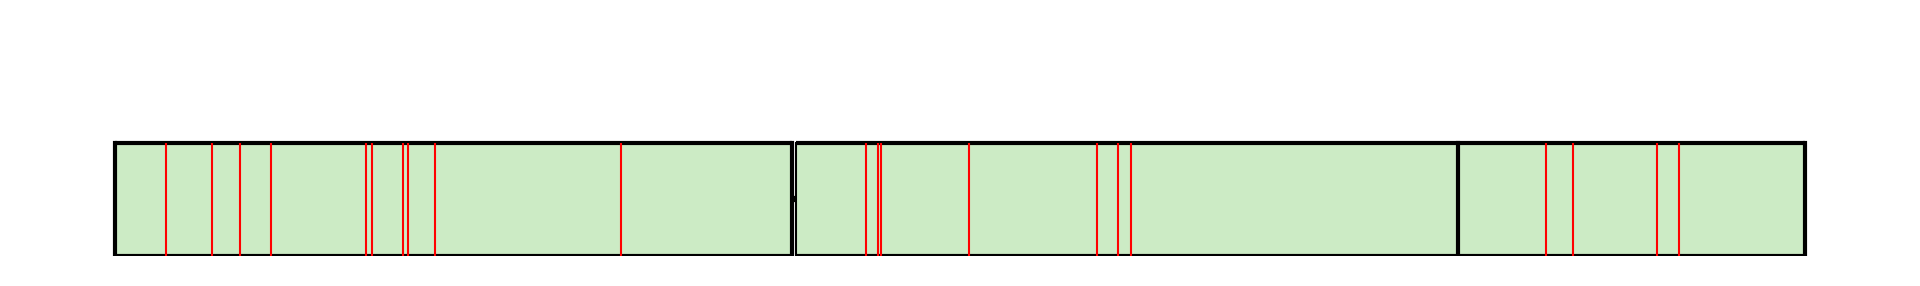

In [11]:
E_ggor_q, E_ggor_s=read_align_file('E_ggorilla_align.txt')
# print(E_ggor_q)
# print(E_ggor_s)

E_ggor_plot, E_ggor_ins, E_ggor_ins_len, E_ggor_del, E_ggor_del_len=parse_mut(E_ggor_q, E_ggor_s)
print(len(E_ggor_plot))


muts=E_ggor_plot
inss=E_ggor_ins
ins_lens=E_ggor_ins_len
dels=E_ggor_del
del_lens=E_ggor_del_len

color=pastels[2]

title='E_ggor'

mm_lw=.5

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

1800


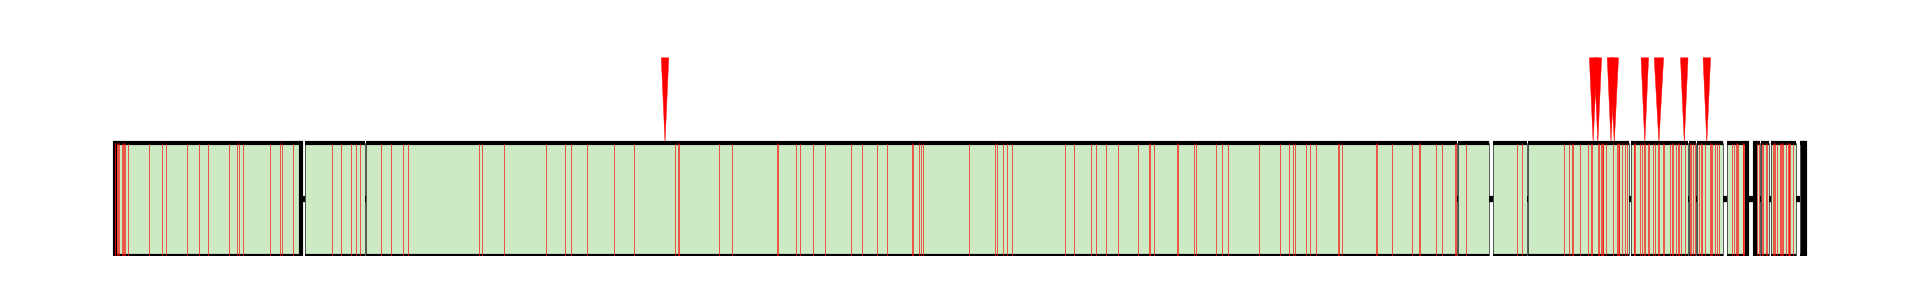

In [12]:
E_panub_q, E_panub_s=read_align_file('E_panubis_align.txt')
# print(E_panub_q)
# print(E_panub_s)

E_panub_plot, E_panub_ins, E_panub_ins_len, E_panub_del, E_panub_del_len=parse_mut(E_panub_q, E_panub_s)
print(len(E_panub_plot))


muts=E_panub_plot
inss=E_panub_ins
ins_lens=E_panub_ins_len
dels=E_panub_del
del_lens=E_panub_del_len

color=pastels[2]

title='E_panub'

mm_lw=.15

mis_pos=[i for i, e in enumerate(muts) if e==1]
h=200

fig, ax=plt.subplots(figsize=(8,1), dpi=300)

#add rectangle from start to first deletion w/ outline
ax.plot([0, min(len(muts), dels[0])], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0, min(len(muts), dels[0])], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([0,0], [0,h], '-', color='black', lw=1)
if dels[0]<=5:
    lw=mm_lw
else: 
    lw=1
ax.plot([min(len(muts), dels[0]),min(len(muts), dels[0])], [0,h], '-', color='black', lw=lw)

rect=matplotlib.patches.Rectangle((0,0), min(len(muts), dels[0]), h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#add rect from last deletion to end w/ outline
ax.plot([max(0, dels[-1]), len(muts)], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([max(0, dels[-1]), len(muts)], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
ax.plot([len(muts), len(muts)], [0,h], '-', color='black', lw=1)
if dels[-1]<=5:
    lw=mm_lw
else:
    lw=1
ax.plot([max(0, dels[-1]), max(0, dels[-1])], [0,h], '-', color='black', lw=lw)
rect=matplotlib.patches.Rectangle((max(0, dels[-1]), 0), len(muts)-dels[-1], h,
                                  facecolor=color, edgecolor='none', linewidth=1)
ax.add_patch(rect)

#deletions
for del_1, del_2, del_1_len in zip(dels[0:-1],dels[1::], del_lens[0::]):
#     print(del_1)
#     print(del_2)
#     print(del_1_len)
    #dashed black line for del 1
    ax.plot([del_1, del_1+del_1_len], [h/2, h/2], '--', color='black', lw=1.5)
    #vertical outline around del1
    if del_1_len<=5:
        lw=mm_lw
    else:
        lw=1
    ax.plot([del_1+del_1_len, del_1+del_1_len], [0,h], '-', color='black', lw=lw) #right boundary of del 1
    ax.plot([del_1, del_1], [0,h], '-', color='black', lw=lw) #left boundary of del 1
    
    #horizontal outline for sequence between del1 and del2
    ax.plot([del_1+del_1_len, del_2], [0,0], '-', color='black', lw=1, solid_capstyle='butt')
    ax.plot([del_1+del_1_len, del_2], [h,h], '-', color='black', lw=1, solid_capstyle='butt')
    #rect patch
    rect=matplotlib.patches.Rectangle((del_1+del_1_len, 0), del_2-(del_1+del_1_len), h,
                                      facecolor=color, edgecolor='none', linewidth=1)
    ax.add_patch(rect)

for mis in mis_pos:
    ax.plot([mis, mis], [0, h], '-', color='red', lw=mm_lw, solid_capstyle='butt')

for ins, ins_len in zip(inss, ins_lens):
    min_w=8
    if ins_len<=min_w:
        tri=matplotlib.patches.Polygon(np.array([[ins+min_w/2, h],[ins+min_w, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    else:
        tri=matplotlib.patches.Polygon(np.array([[ins+ins_len/2, h],[ins+ins_len, h+150], [ins, h+150]]), closed=True,
                                   facecolor='red', joinstyle='miter', edgecolor='red', linewidth=.1)
    ax.add_patch(tri)


ax.set_ylim(0,400)
# ax.set_xlim(500,700)

ax.tick_params(length=0)
ax.set_xticks([])
ax.set_yticks([])

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(0)
ax.set_alpha(0)
plt.show()
plt.tight_layout()
fig.savefig(title+'.pdf', bbox_inches='tight')
plt.close()

[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


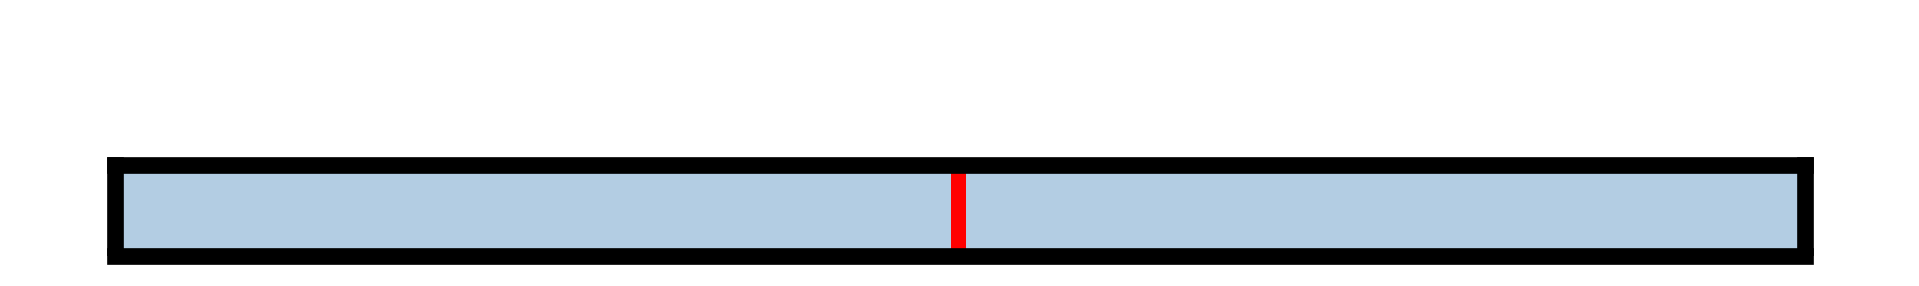

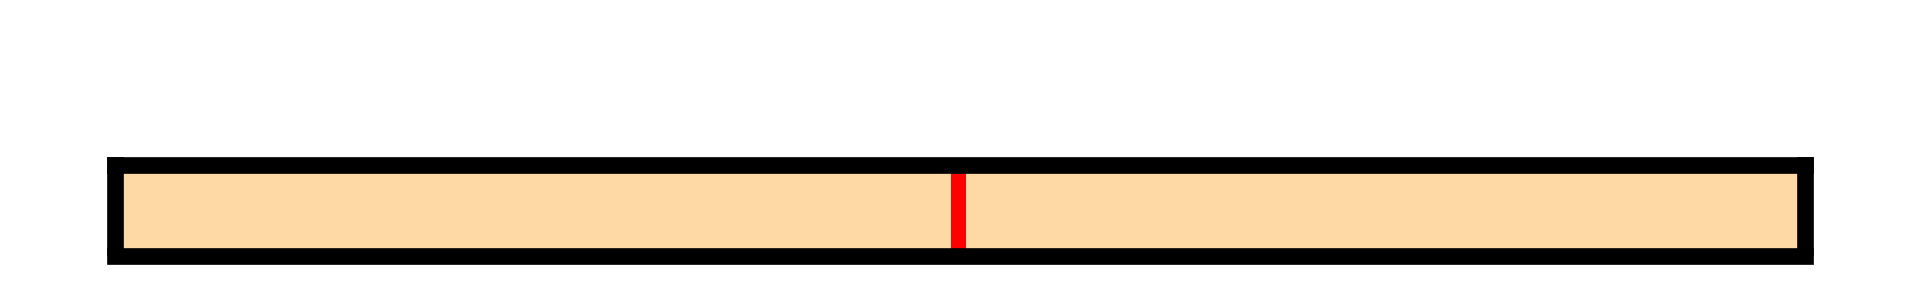

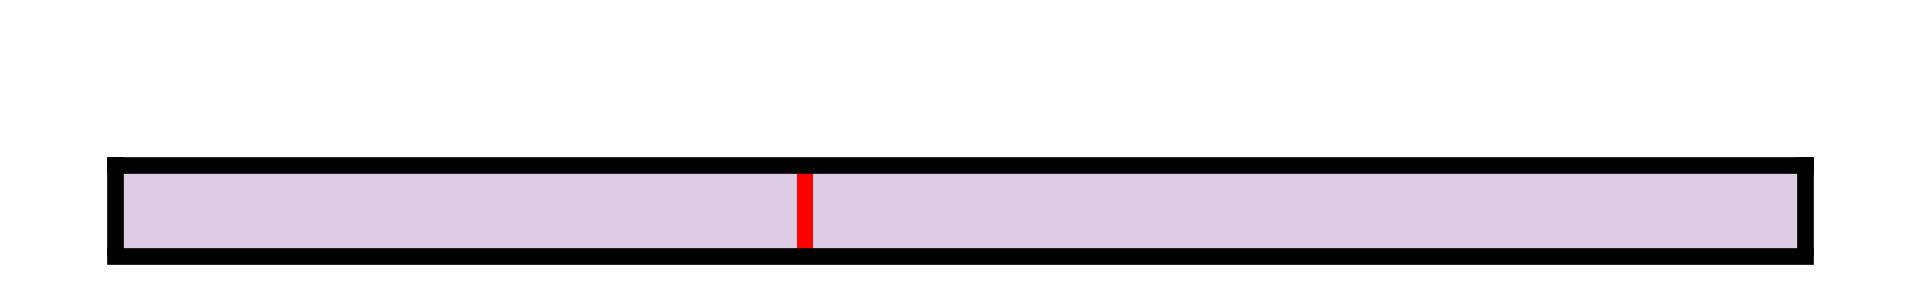

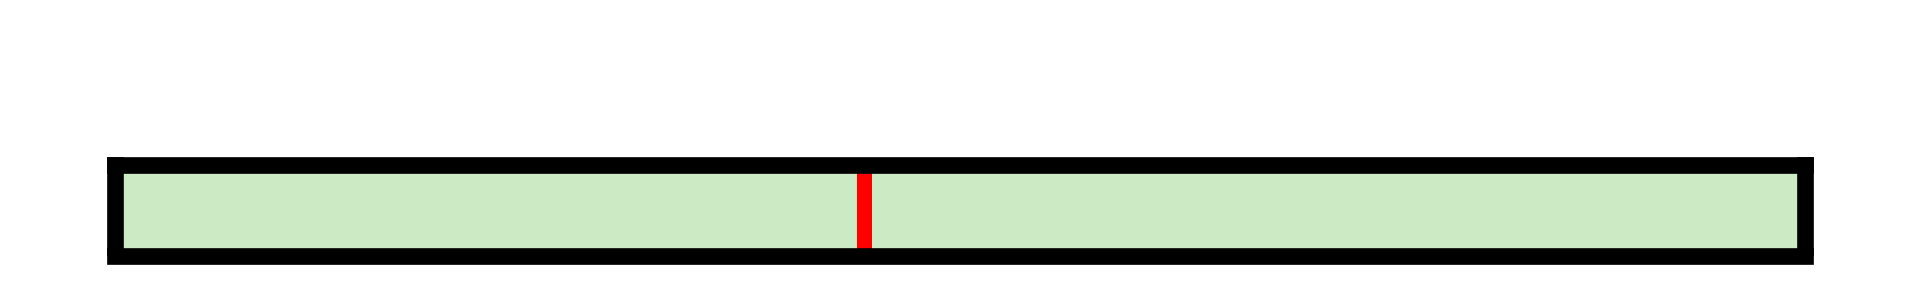

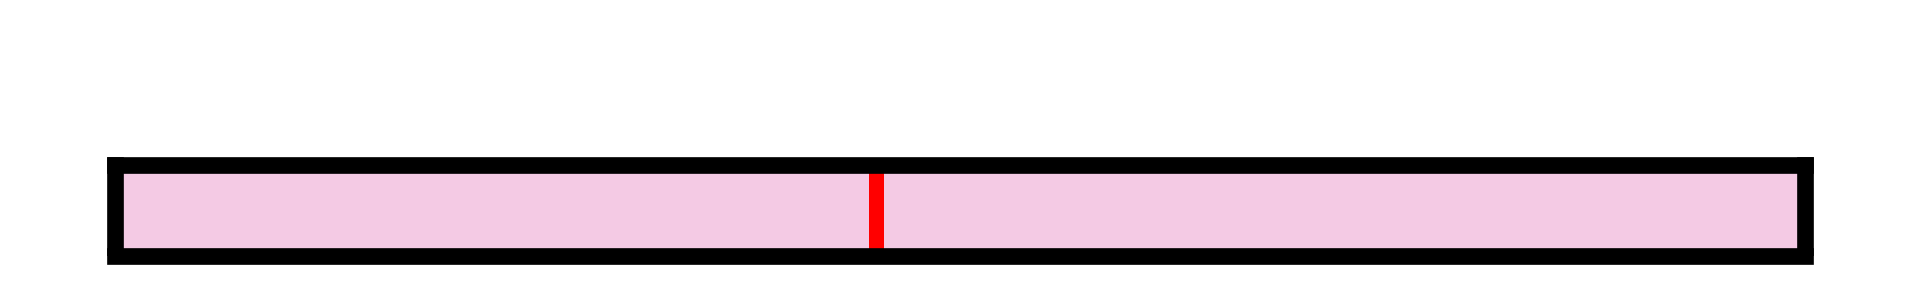

In [13]:
x=8
A=np.zeros(1800)
A[899-x:899+x]=1
C=np.zeros(1800)
C[899-x:899+x]=1
D=np.zeros(1691)
D[691-x:691+x]=1
E=np.zeros(1800)
E[799-x:799+x]=1
F=np.zeros(1823)
F[822-x:822+x]=1
ins=[]
ins_len=[]

print(A[890:905])
plot_align(A, ins, ins_len, pastels[3], 'A_SNPvar')
plot_align(C, ins, ins_len, pastels[0], 'C_SNPvar')
plot_align(D, ins, ins_len, pastels[1], 'D_SNPvar')
plot_align(E, ins, ins_len, pastels[2], 'E_SNPvar')
plot_align(F, ins, ins_len, pastels[4], 'F_SNPvar')


[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


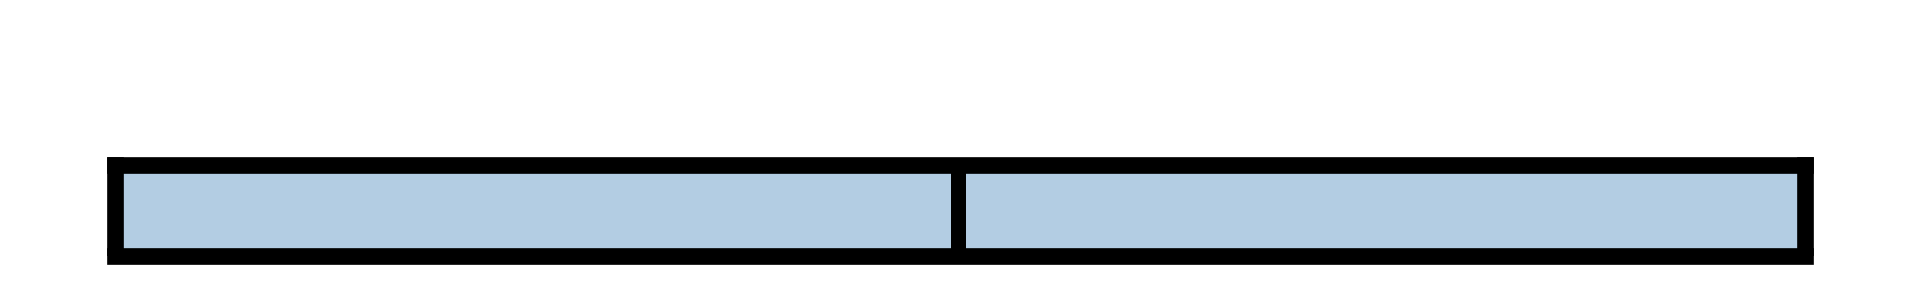

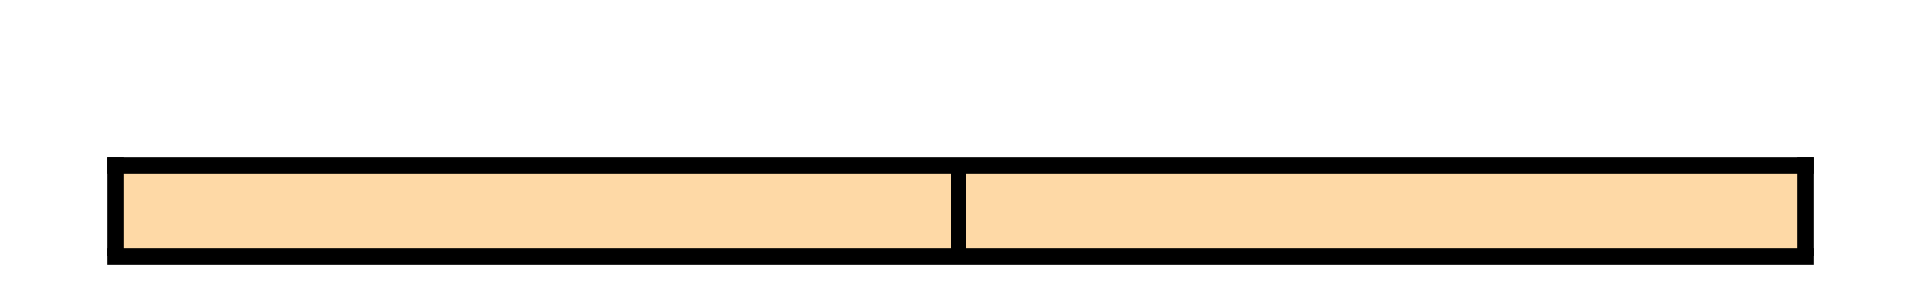

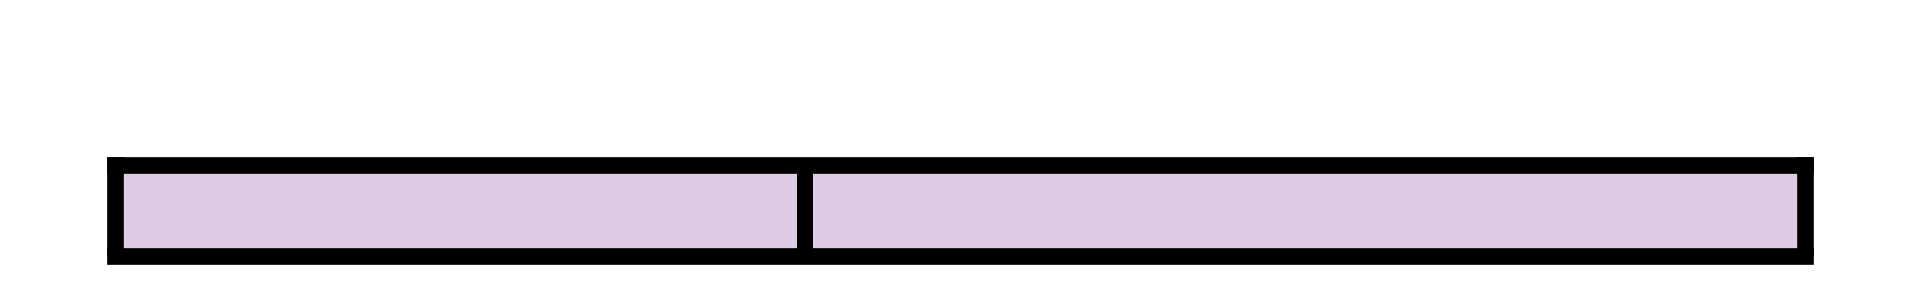

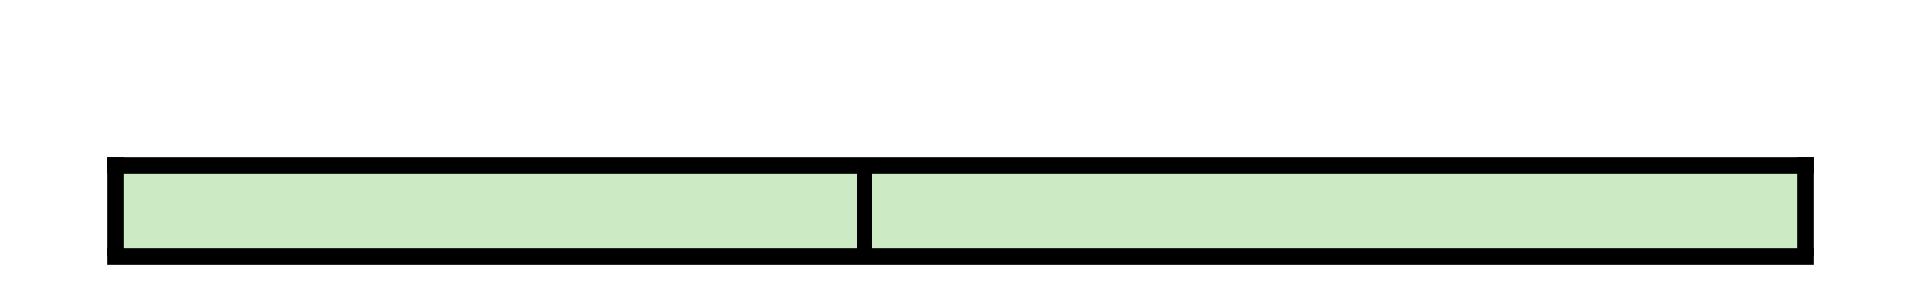

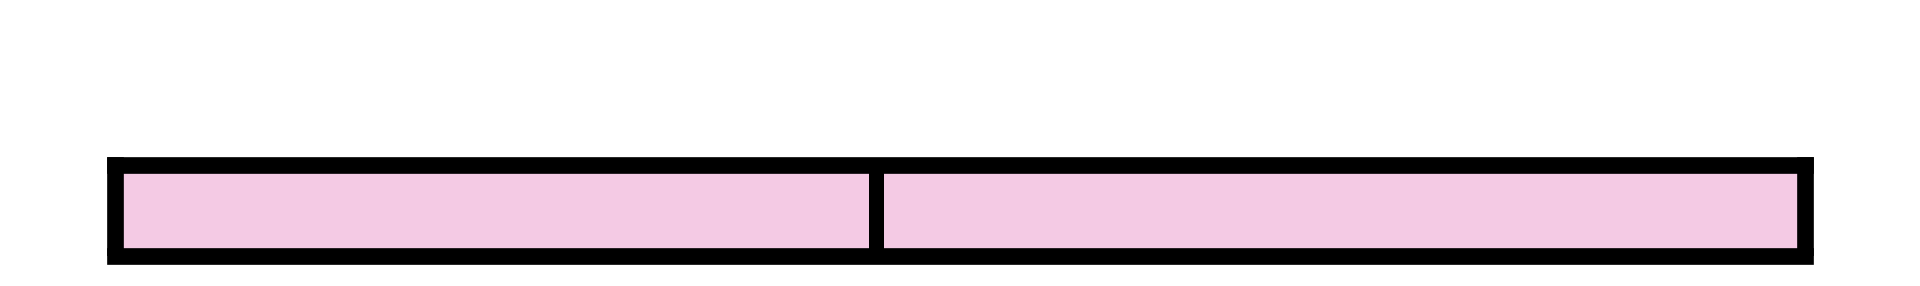

In [15]:
def plot_align2(mut, ins, ins_len, color, fname):
    fig, ax=plt.subplots(figsize=(8,1), dpi=300)
    w=.1
    z=np.array(mut)
    x=np.arange(0, len(z), 1)
    
    for pos in ins:
        ax.bar(pos*w, 1.3, width=w, color='red')
#         ax.plot([pos*w, pos*w], [1, 1.3], '-', color='red', linewidth=w)
    
#    for pos, ins_l in zip(ins, ins_len):
#         ax.plot([(pos+ins_l/2)*w, (pos+ins_l)*w, (pos)*w, (pos+ins_l/2)*w], [1, 1.3, 1.3, 1], '-', color='red', linewidth=.1)
#         plt.fill([(pos+ins_l/2)*w, (pos+ins_l)*w, (pos)*w, (pos+ins_l/2)*w], [1, 1.3, 1.3, 1], color='red')
        #ax.bar([(pos+ins_l/2)*w], [2], width=w*ins_l, color='red')
    ax.bar(x[z==1]*w, np.ones(len(z[z==1])), width=w, color='black')
    ax.bar(x[z==0]*w, np.ones(len(z[z==0])), width=w, color=color)    
#     ax.bar(x[z==3]*w, -.3*np.ones(len(z[z==3])), width=w, color='red')
    ax.set_ylim([0,2.5])
    ax.set_yticks([])
    ax.set_xticks([])
    
    lw=4
    ax.plot([0,len(z)*w], [0,0], '-', color='black', linewidth=lw, clip_on=False)
    ax.plot([0,len(z)*w], [1,1], '-', color='black', linewidth=lw)
    ax.plot([0,0], [0,1], '-', color='black', linewidth=lw)
    ax.plot([len(z)*w,len(z)*w], [0,1], '-', color='black', linewidth=lw)
    
    ax.tick_params(which='major', direction='out', length=0, width=4)
    ax.tick_params(which='minor', direction='out', length=0, width=2)
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(0)
        ax.spines[axis].set_color('black')
    ax.tick_params(axis='both', which='major', labelsize=40)
    
    ax.set_alpha(0)

    plt.show()
    plt.tight_layout()
    fig.savefig(fname+'.pdf', bbox_inches='tight')#, transparent=True)
    plt.close()
    
x=8
A=np.zeros(1800)
A[899-x:899+x]=1
C=np.zeros(1800)
C[899-x:899+x]=1
D=np.zeros(1691)
D[691-x:691+x]=1
E=np.zeros(1800)
E[799-x:799+x]=1
F=np.zeros(1823)
F[822-x:822+x]=1
ins=[]
ins_len=[]

print(A[890:905])
plot_align2(A, ins, ins_len, pastels[3], 'A_SNP')
plot_align2(C, ins, ins_len, pastels[0], 'C_SNP')
plot_align2(D, ins, ins_len, pastels[1], 'D_SNP')
plot_align2(E, ins, ins_len, pastels[2], 'E_SNP')
plot_align2(F, ins, ins_len, pastels[4], 'F_SNP')
